# OpenCV

OpenCV is one of the most popular libraries for (classical) Computer Vision tasks, like image processing, feature extraction, filtering, geometric transformations, and even for creating overlays like the ones needed for augmented reality. OpenCV is generally **not used** for performing Deep Learning tasks, although we can use OpenCV for instance for face detection. Even in the early 2000's, with Viola-Jones, we could use Computer Vision techniques, like Haar Cascades (see below), to detect patterns like a face in an image, without the need for a neural network.

Originally written in C/C++, OpenCV now provides bindings for Python. That's why we'll give it a spin here, in this notebook.

In this Notebook we will install OpenCV, explain what color models are, manipulate the pictures (for extracting some useful information from them) and draw figures on images. As a final step we will try to do face detection with photos of some famous Belgian athletes, using a classical cascade classifier, so without the need for a neural network.

## 1. Installation

First things first, let’s install OpenCV.

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-python opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


After you finish the installation, try importing the package to see if it works well. If you get the return without any errors, then you’re now ready to go!

In [3]:
import cv2
cv2.__version__

'4.9.0'

The first step we’re going to do with OpenCV is importing an image and plot it using *Matplotlib*.

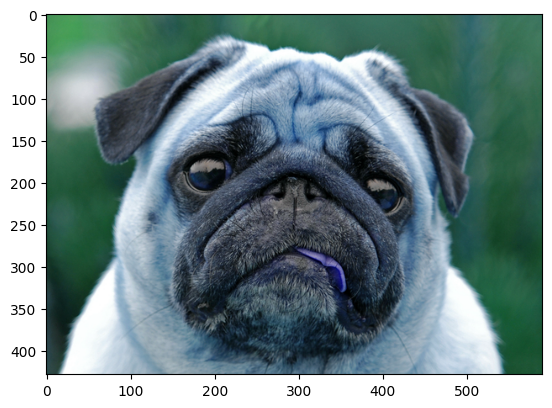

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# import the image
img_orig = cv2.imread('resources/dog.jpg')
plt.imshow(img_orig)

## 2. Color Models

Our dog looks a little bit strange. The default setting of the color mode in OpenCV comes in the order of BGR, which is different from that of Matplotlib. Therefore to see the image in RGB mode, we need to convert it from BGR to RGB as follows.

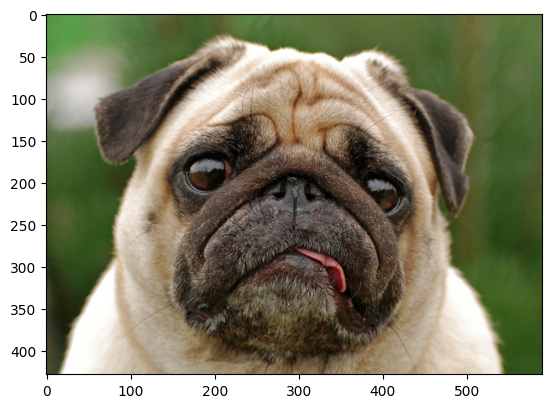

In [5]:
# convert the image from BGR into RGB
img_rgb = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

A color model is a system for creating a full range of colors using primary colors. Additive models use light to represent colors in computer screens while subtractive models use inks to print those digital images on papers. The primary colors are red, green and blue (RGB) for the first one and cyan, magenta, yellow and black (CMYK) for the latter one. All the other colors we see on images are made by combining or mixing these primary colors.

<img src="./resources/colormodels.png" style="height: 250px"/>

A grayscale is another simple color model quite often used in Computer Vision. It represents images and morphologies by the intensity of black and white, which means it has only one channel.

(-0.5, 589.5, 427.5, -0.5)

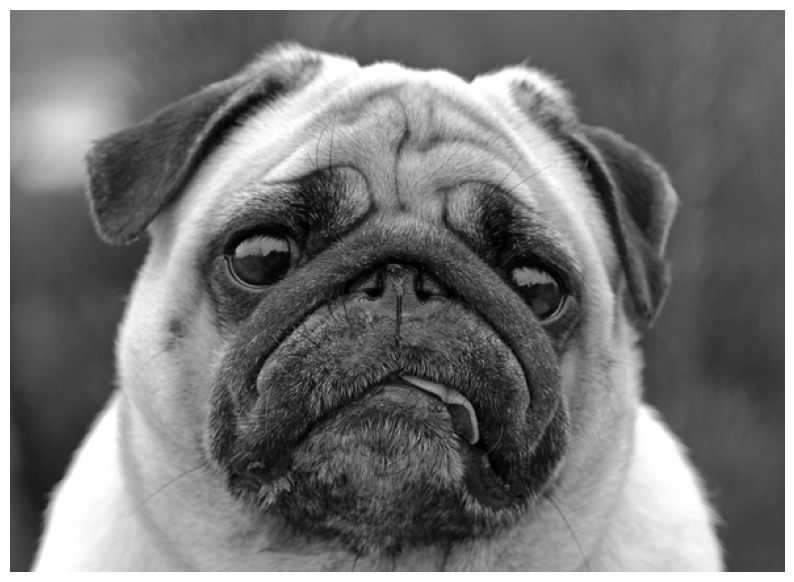

In [6]:
# convert the image into gray scale
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (10, 10))
plt.imshow(img_gray, cmap = 'gray')
plt.axis('off')

## 3. Overlays: Drawing on images

Using OpenCV you can draw figures on images. We will only demonstrate the drawing of a rectangle, but you can of course draw circles, put texts, ... as well. You will use the other methods in the exercise.

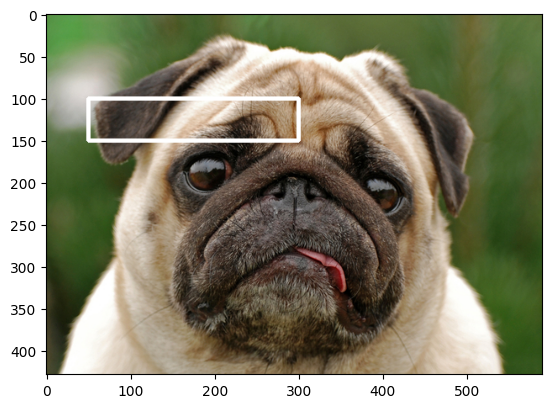

In [7]:
color = (255, 255, 255)
line_thickness = 3

x1 = 50
y1 = 100 # upperleft corner

x2 = 300
y2 = 150 # lowerright corner

cv2.rectangle(img_rgb, (x1, y1), (x2, y2), 
              color, line_thickness)
plt.imshow(img_rgb)

### Exercise

Try to draw a circle arround the nose of the dog.

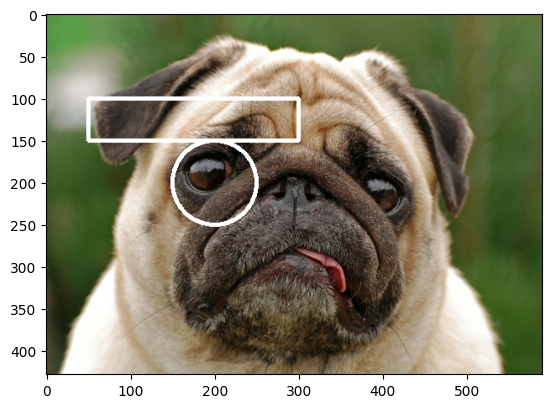

In [8]:
# draw a circle
cv2.circle(img_rgb, (200, 200), 50, color, line_thickness)
plt.imshow(img_rgb)


## 4. Edge detection

In the previous Notebook we explained how you can use convolution filters to compute a feature map that can be used for feature detection. *Canny Edge Detection* is one of the most popular algorithms for detecting edges. It is a combination (a multi-stage process) of different filters like noise reduction, thresholding, etc. To be exact (out-of-scope): a noise reduction (Gaussian Blur), detection of intensity gradients (via Sobel kernel in horizontal and vertical direction), non-maximum suppression (suppress weak edges, so only the strong remain), and a thresholding to determine the final edges.

(-0.5, 589.5, 427.5, -0.5)

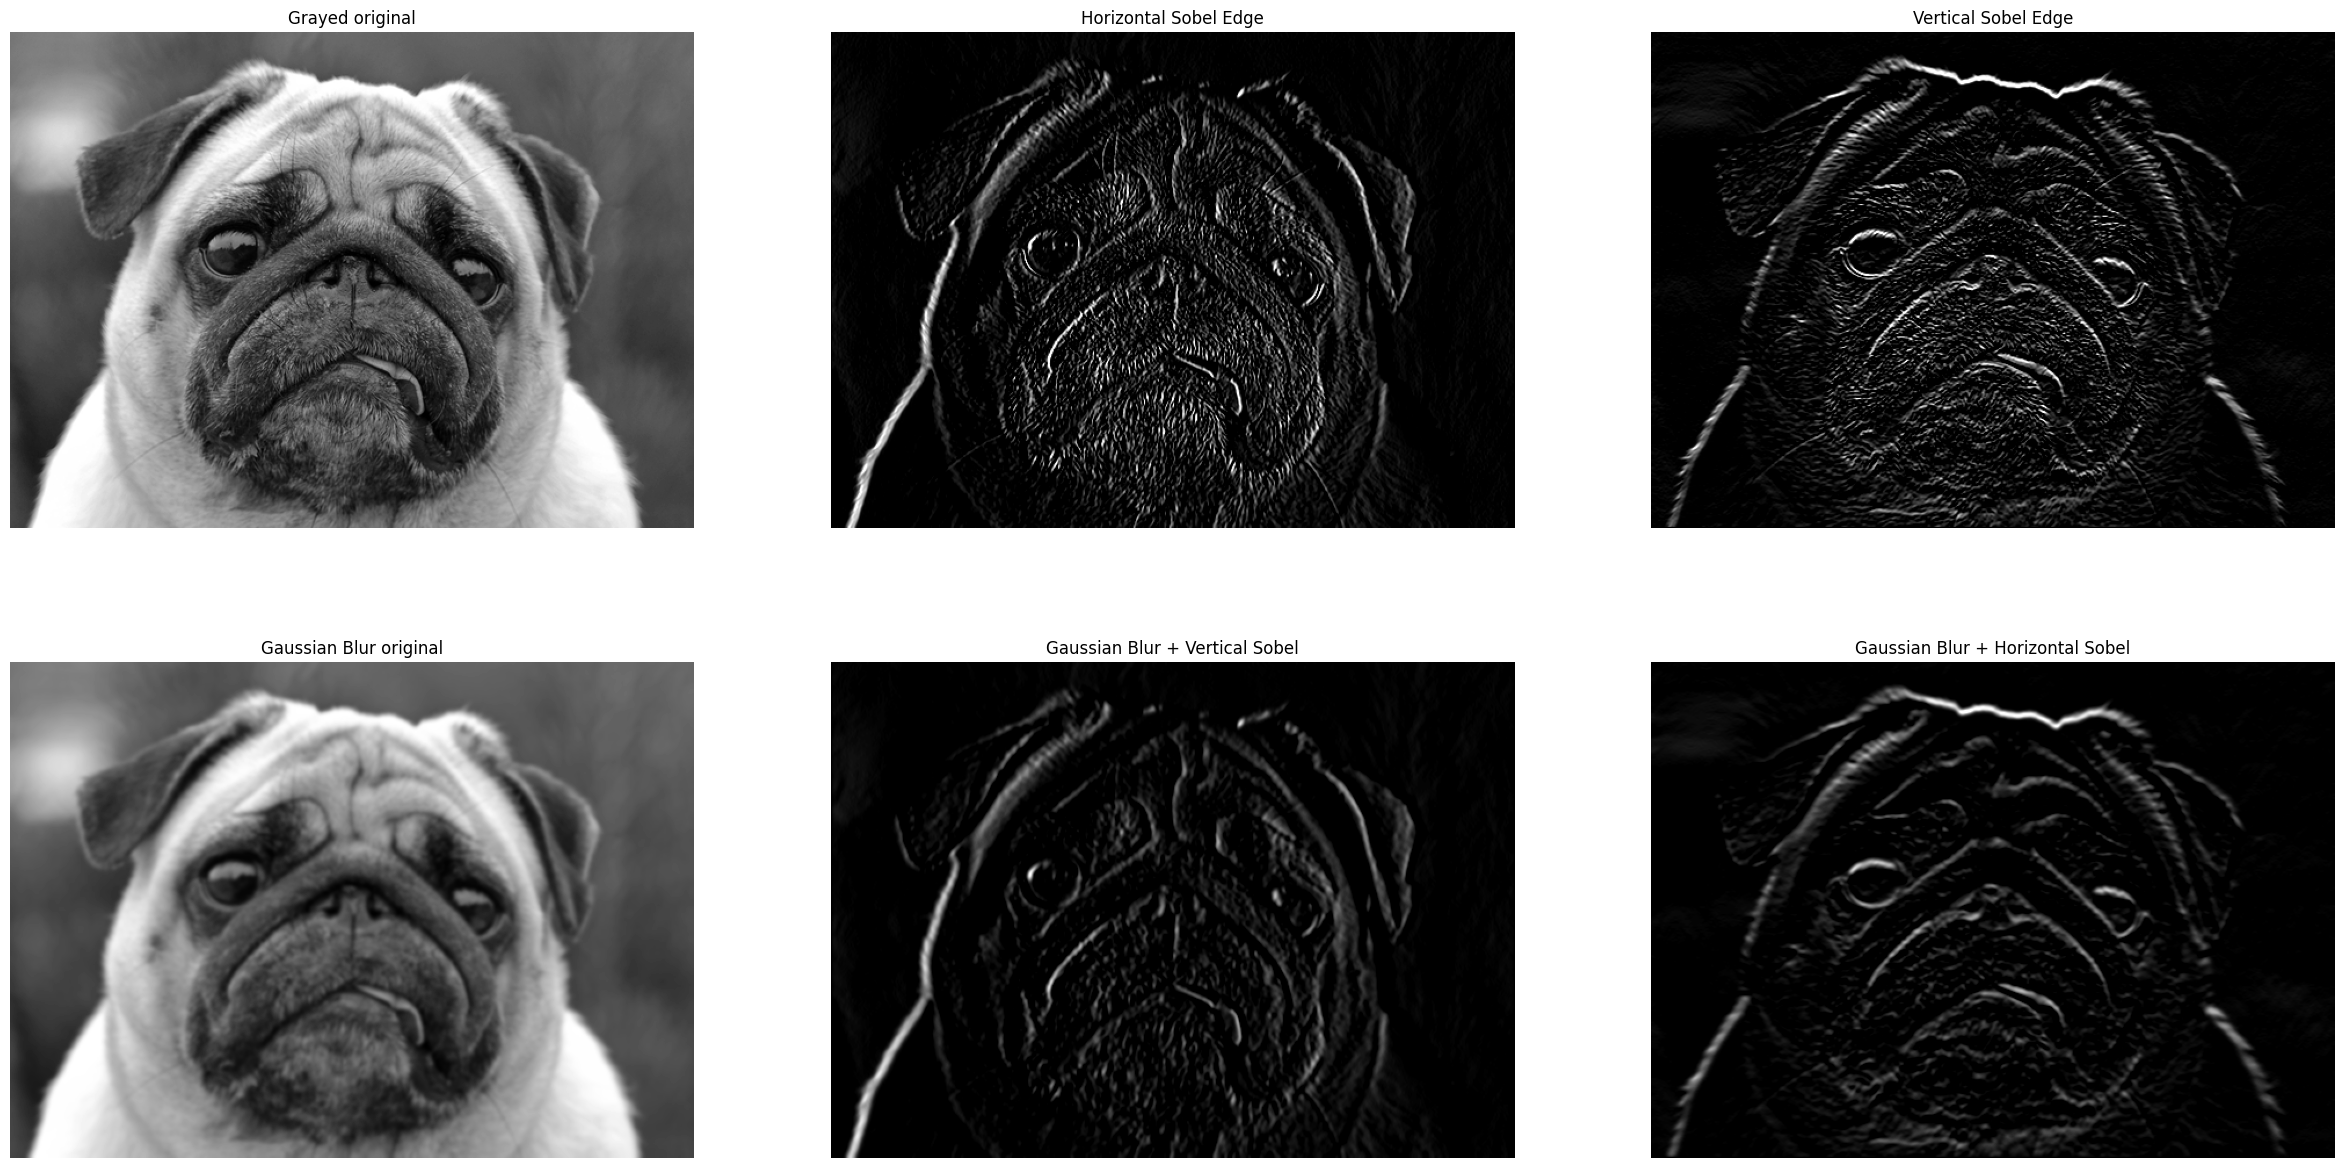

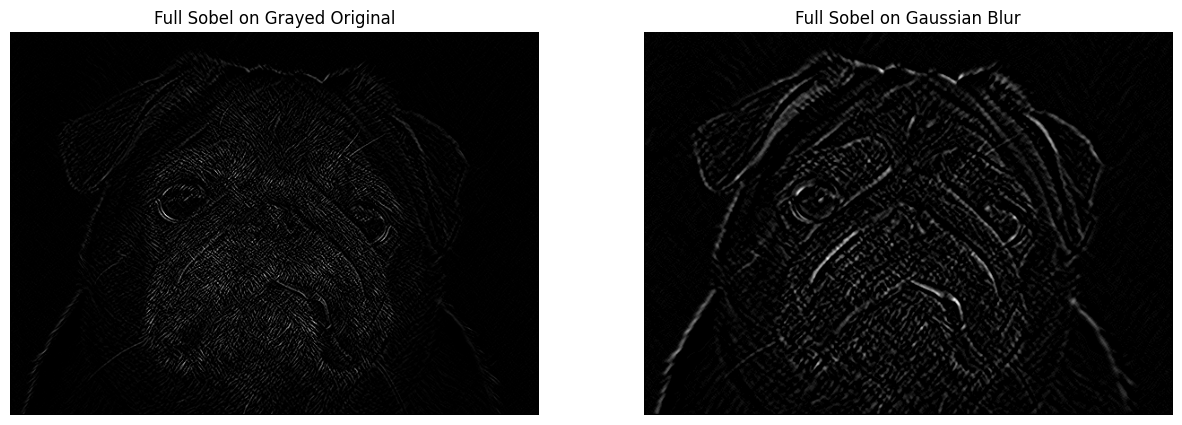

In [9]:
img_orig = cv2.imread('resources/dog.jpg')
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_BGR2GRAY)

# First, let's do a Gaussian Blur to smooth the image
# GaussianBlur(src_img, (kernelsize)v, standard deviation) --> standard deviation of 0 means: look at kernelsize to determine the standard deviation
img_blur = cv2.GaussianBlur(img_gray, (7,7), 0)

# Next, let's do Sobel
# Sobel(src_img, destination image depth like 8-bit, or use -1 to use same depth as source, x direction, y direction, kernel size: must be 1,3,5,or7)

# Sobel on the original image
img_sobel_hor = cv2.Sobel(img_gray,-1,1,0,3)
img_sobel_vert = cv2.Sobel(img_gray,-1,0,1,3)
img_sobel_all = cv2.Sobel(img_gray,-1,1,1,3)
# Sobel on Gaussian blurred image
img_sobel_hor_blur = cv2.Sobel(img_blur,-1,1,0,3)
img_sobel_vert_blur = cv2.Sobel(img_blur,-1,0,1,3)
img_sobel_all_blur = cv2.Sobel(img_blur,-1,1,1,3)

plt.figure(figsize = (30, 15))
ax = plt.subplot(2, 3, 1); plt.imshow(img_gray, cmap='gray'); ax.set_title("Grayed original")
plt.axis('off')
ax = plt.subplot(2, 3, 2); plt.imshow(img_sobel_hor, cmap='gray'); ax.set_title("Horizontal Sobel Edge")
plt.axis('off')
ax = plt.subplot(2, 3, 3); plt.imshow(img_sobel_vert, cmap='gray'); ax.set_title("Vertical Sobel Edge")
plt.axis('off')
ax = plt.subplot(2, 3, 4); plt.imshow(img_blur, cmap='gray'); ax.set_title("Gaussian Blur original")
plt.axis('off')
ax = plt.subplot(2, 3, 5); plt.imshow(img_sobel_hor_blur, cmap='gray'); ax.set_title("Gaussian Blur + Vertical Sobel")
plt.axis('off')
ax = plt.subplot(2, 3, 6); plt.imshow(img_sobel_vert_blur, cmap='gray'); ax.set_title("Gaussian Blur + Horizontal Sobel")
plt.axis('off')

plt.figure(figsize = (15, 15))
ax = plt.subplot(1, 2, 1); plt.imshow(img_sobel_all, cmap='gray'); ax.set_title("Full Sobel on Grayed Original")
plt.axis('off')
ax = plt.subplot(1, 2, 2); plt.imshow(img_sobel_all_blur, cmap='gray'); ax.set_title("Full Sobel on Gaussian Blur")
plt.axis('off')



(-0.5, 589.5, 427.5, -0.5)

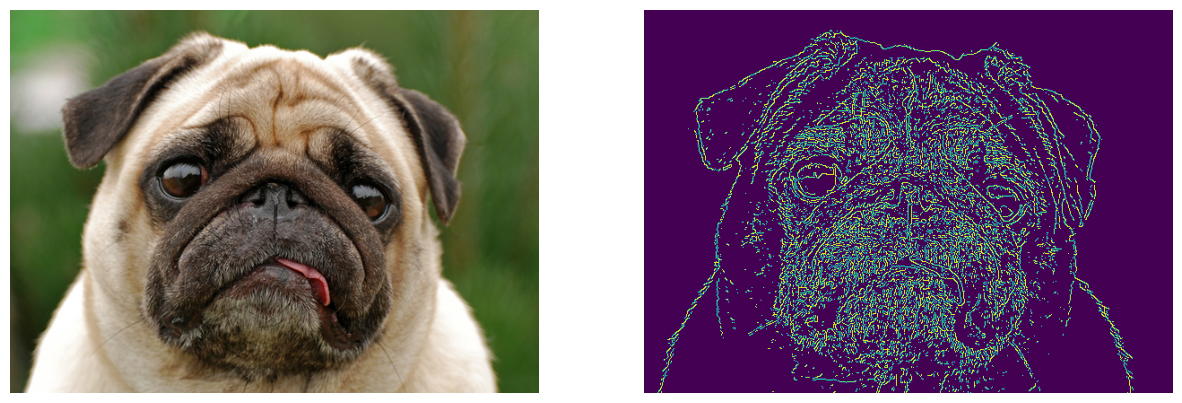

In [10]:
img_orig = cv2.imread('resources/dog.jpg')
img_rgb = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)

# canny detection without blurring
img_canny = cv2.Canny(img_rgb, threshold1=127, threshold2=127)
plt.figure(figsize = (15, 15))
plt.subplot(1, 2, 1); plt.imshow(img_rgb)
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(img_canny)
plt.axis('off')

Given the two different threshold values, we get three ranges of values. So if the intensity gradient of a point is higher than the upper threshold, it will be considered as ‘sure-edge.’ If the gradient of a point is lower than the lower threshold, the point will be discarded. And in case of the gradient being in the middle of the two thresholds, we see its connectivity to other ‘sure-edge’ points. If there’s no connection, it will be discarded as well. We just used the median value for the two thresholds (127) without blurring and the result isn’t quite desirable.

Let's play arround with the lower and upper threshold values, use blurring to reduce noise and apply two different sizes of kernels: (3x3) and (5x5). By the way, the kernel size is normally always odd.

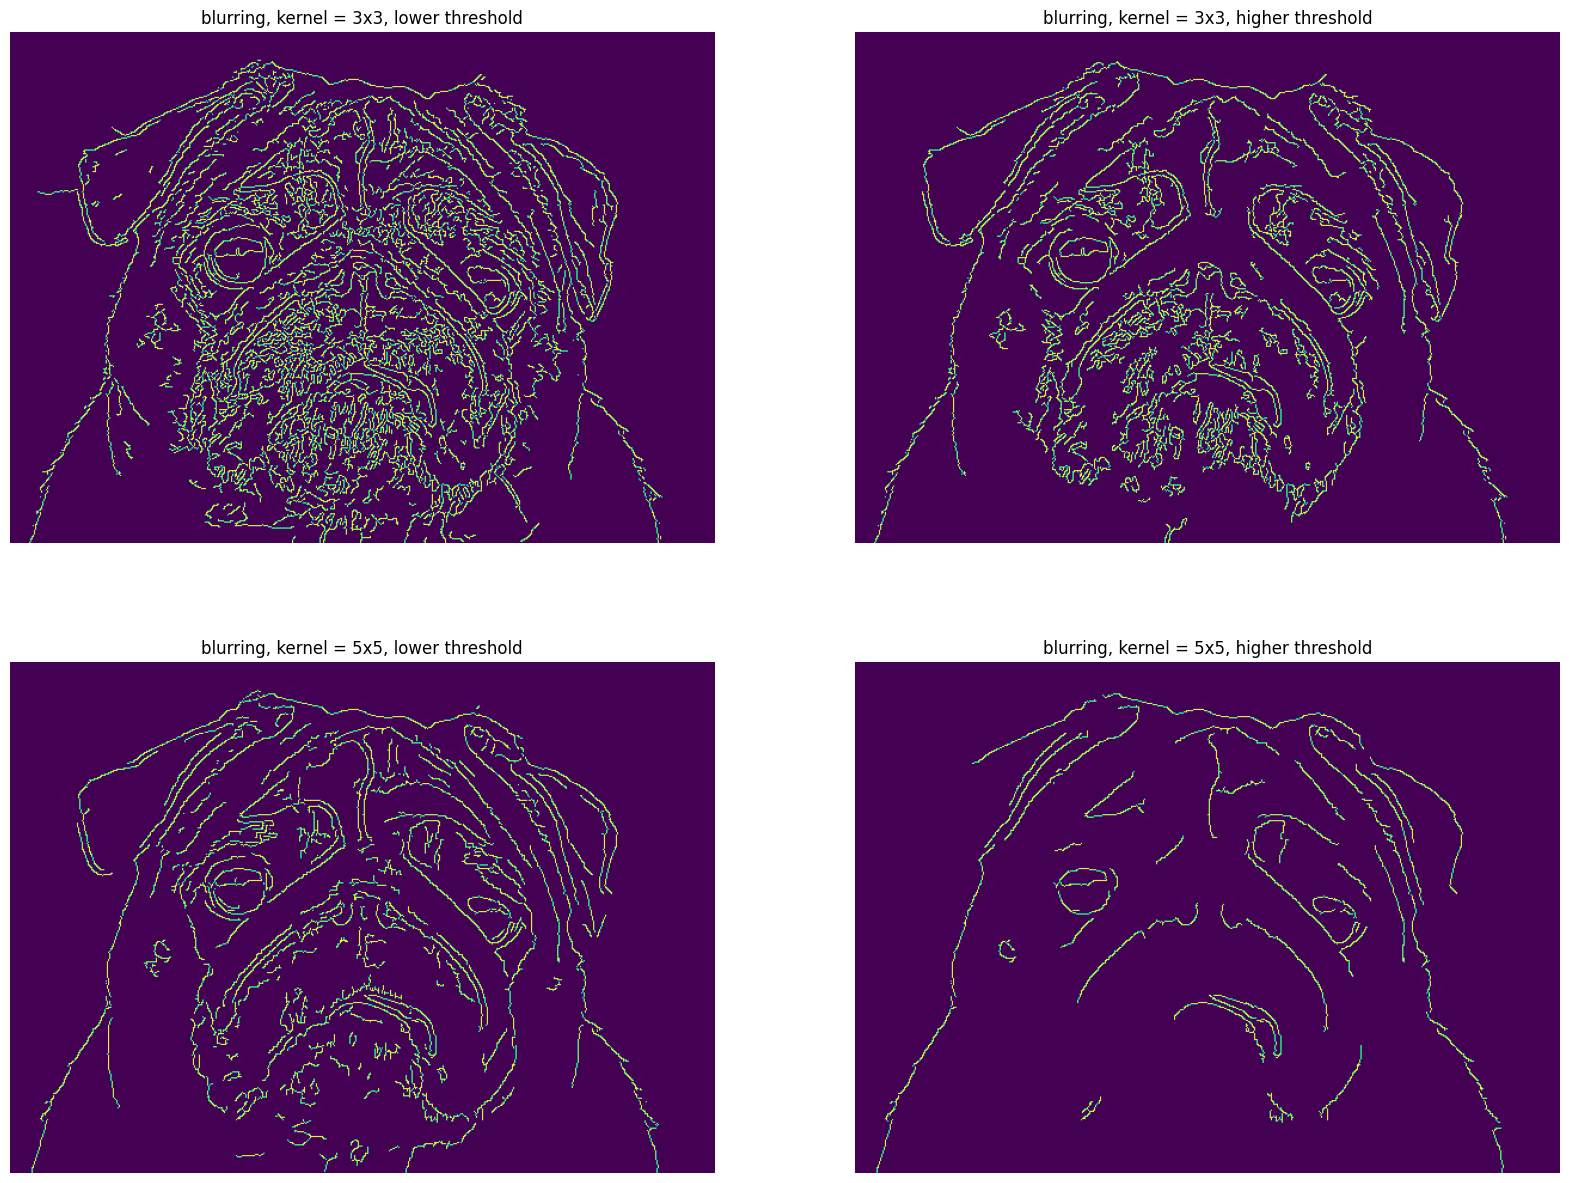

In [11]:
# set the lower and upper threshold
med_val = np.median(img_orig)
lower = int(max(0, .7 * med_val))
upper = int(min(255, 1.3 * med_val))

# blurring with ksize = 3
img_k3 = cv2.blur(img_orig, ksize = (3, 3))
# canny detection with different thresholds
edges_k3 = cv2.Canny(img_k3, threshold1 = lower, threshold2 = upper)
edges_k3_2 = cv2.Canny(img_k3, lower, upper + 75)

# blurring with ksize = 5 
img_k5 = cv2.blur(img_orig, ksize = (5, 5))
# canny detection with different thresholds
edges_k5 = cv2.Canny(img_k5, lower, upper)
edges_k5_2 = cv2.Canny(img_k5, lower, upper + 75)

# plot the images
images = [edges_k3, edges_k3_2, edges_k5, edges_k5_2]
titles = ['blurring, kernel = 3x3, lower threshold', 
          'blurring, kernel = 3x3, higher threshold', 
          'blurring, kernel = 5x5, lower threshold', 
          'blurring, kernel = 5x5, higher threshold']
plt.figure(figsize = (20, 15))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(titles[i])
        
plt.show()

As you can see above, blurring helps to remove noise and we got the best results with the (5x5) filter with the lower threshold.

## 5. Face detection with OpenCV

Face **detection** is a technology identifying the presence and the position of human faces in digital images. Don't confuse it with Face **recognition**, which is the identification of a person by his or her face, and for that we do need a neural network. Face, or image, recognition with neural networks, is the main topic in the next Notebook.

## Cascade Classifier Models

Because faces are so complicated, there isn’t one simple test that will tell you if a face is found or not. Instead, there are thousands of small patterns and features that must be matched. The algorithms breaks the task of identifying the face into thousands of smaller, bite-sized tasks, each of which is easy to solve. These detection patterns are also bundeled into several stages, each building on top of the detection power of the previous one: see below.

For something like a face, you might have 6,000 or more classifiers, all of which must match for a face to be detected. But therein lies the problem: for face detection, the algorithm starts at the top left of a picture and moves down across small blocks of data, looking at each block, constantly asking, “Is this a face? … Is this a face? … Is this a face?” Since there are 6,000 or more tests per block, you might have millions of calculations to do, which will grind your computer to a halt.

To get around this, OpenCV uses cascades. Like a series of waterfalls, the OpenCV cascade breaks the problem of detecting faces into multiple stages. For each block, it does a very rough and quick test. If that passes, it does a slightly more detailed test, and so on. The advantage is that the majority of the picture will return a negative during the first few stages, which means the algorithm won’t waste time testing all 6,000 features on it. Instead of taking hours, face detection can now be done in real time.

For this notebook, we'll be using pre-trained cascade models (so we don't have to figure out which patterns we need, and how many stages). These pretrained cascade models can be found in the resource folder, in xml format.

## 6. Red Lions

Let's try to detect all the faces of the Red Lions, the Belgian national men's field hockey team.

We first convert the image into grayscale (our pretrained model is for grayscale images) and use the Haar Cascade classifier to detect faces and draw a rectangle around them. 

Some settings are needed as well, because object detection is not a very simple job:

**Out of scope for this course**:

**Scale Factor**: 
    
1. Image Division:
        
        The original image is divided into a grid of overlapping windows (also known as regions of interest).
        Each window represents a potential location where an object might be present.

2. Scanning at Different Scales:
        
        At each window, the classifier (such as a Haar or LBP classifier) evaluates whether an object is present or not.
        The next window is obtained by scaling down the image by the specified scaleFactor.
        The process continues until the entire image is covered.
<img src="./resources/ScaleFactor.png" style="height: 250px"/>


3. Why Multiple Scales?:
        
        Objects can appear at different sizes due to varying distances from the camera or variations in object size within the scene.
        By scanning at multiple scales, the algorithm can detect objects regardless of their size.
        However, setting a very small scaleFactor may increase computation time, so it’s essential to strike a balance.
        
In essence, the algorithm explores different image scales to ensure robustness in detecting objects of varying sizes.

**Minimum Neighbors**:

1. How it works:
        
        After detecting potential objects (rectangles) in the image, the algorithm groups nearby rectangles (found by sliding window, and via different scales) that overlap significantly.
        If a rectangle has fewer neighbors than the specified minNeighbors, it is rejected.
        The idea is to filter out false positives (incorrect detections) by ensuring that only well-supported rectangles are considered.

2. Higher Value, Fewer Detections, Higher Quality:
        
        Setting a higher value for minNeighbors results in fewer detections but with higher confidence.
        It helps eliminate spurious rectangles that might arise due to noise or partial object matches.
        For example, if minNeighbors is set to 3, a rectangle must have at least 3 neighboring rectangles to be considered valid.

3. Balancing Act:
        
        While higher minNeighbors reduces false positives, be cautious not to set it too high.
        Very high values may cause the algorithm to miss true positives (actual objects) as well.
        Finding the right balance depends on the specific use case and desired trade-off between sensitivity and precision.

In summary, minNeighbors plays a crucial role in refining the detected object regions by considering the spatial relationships between neighboring rectangles.

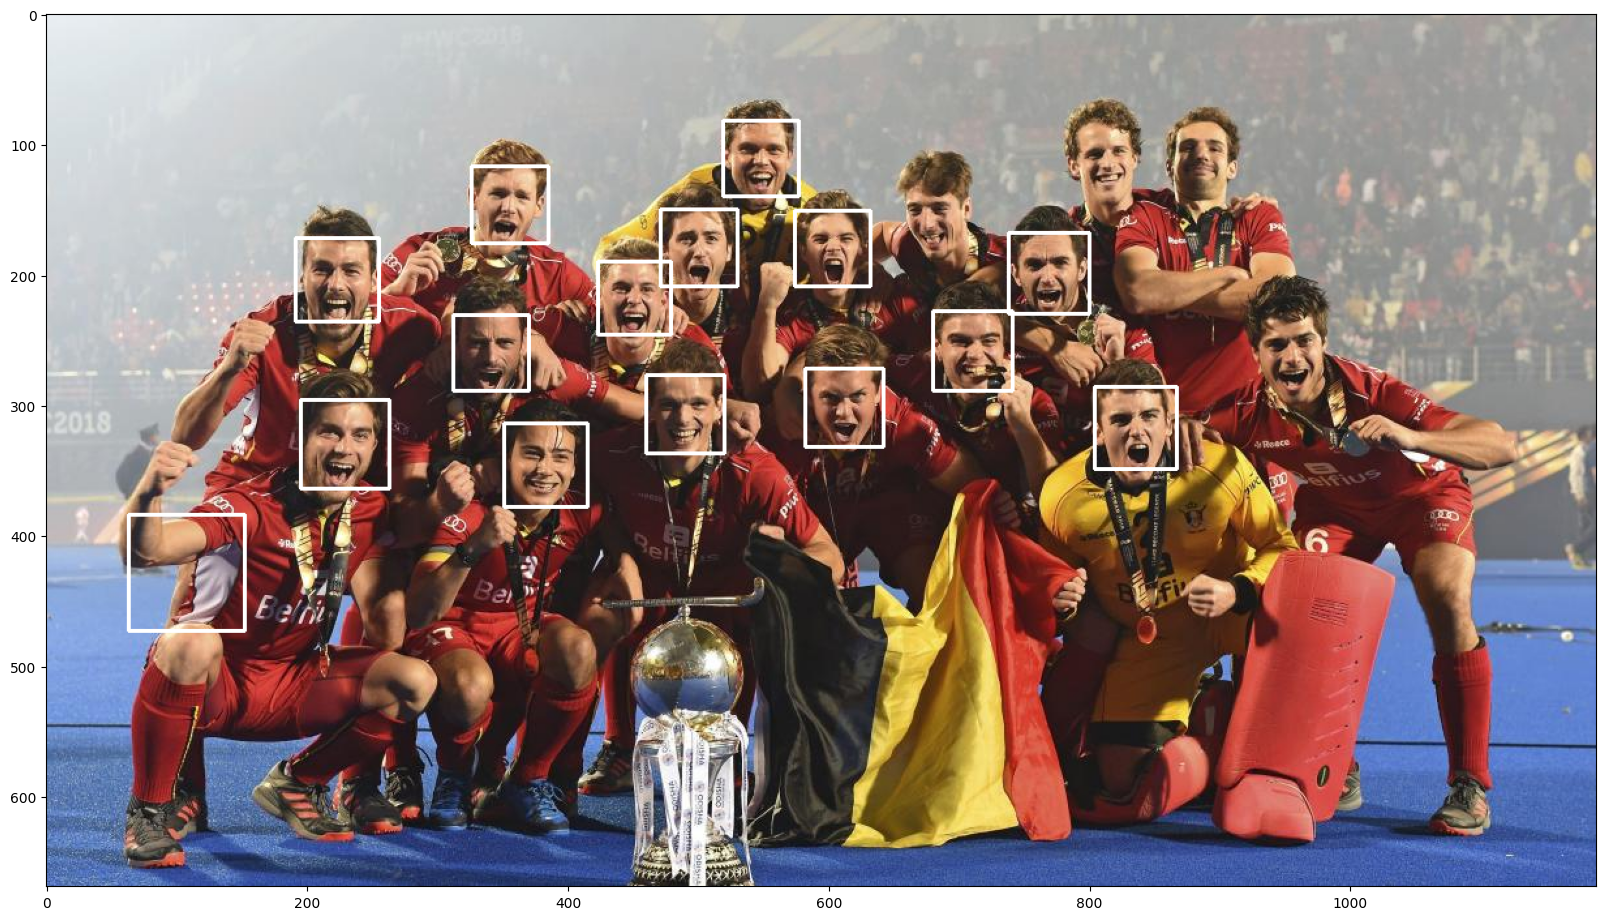

In [19]:
classifier = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
img_orig = cv2.imread('resources/redlions.jpg')

img_rgb = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_BGR2GRAY)

regions = classifier.detectMultiScale(img_gray, 
                                      1.3, #  scaleFactor is a parameter for how much the image size is reduced 
                                      7) # minNeighbors for how many neighbors each candidate rectangle should be trained

for (x, y, w, h) in regions:
    img_rgb = cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (255, 255, 255), 2) 

plt.figure(figsize = (20,20))
plt.imshow(img_rgb)

## 7. Nafi Thiam - Exercise

Now use the __eye classifier__ (in the `haarcascades` folder) on a photo of Nafi Thiam (you can find the jpg in the resources), our gold medal heptathlon athlete at the Olympics.

Play around with the two parameters (`scaleFactor` and `minNeighbors`) and try to capture (only) the two eyes of our gold medalist.

## 8. Want to try yours?

Would you like to try yours with a Webcam? We can apply the same process. You can shut down the window by pressing ESC.

In [17]:
import cv2
import numpy as np

# step 1: define detect function
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

def detect_face(img):
    
    img_copy = img.copy()
    face_rects = face_cascade.detectMultiScale(img_copy)
    
    for (x, y, w, h) in face_rects:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255, 255, 255), 3)
        
    return img_copy

# step 2: call the cam
cap = cv2.VideoCapture(0) 

while True: 
    
    ret, frame = cap.read(0) 
     
    frame = detect_face(frame)
    cv2.imshow('Video Face Detection', frame) 
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()

KeyboardInterrupt: 

: 

## 9. Exercise

In the `haarcascades` directory you will find other classifiers. Try the __body classifier__ and and apply it on a photo you've taken yourself.